In [60]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [132]:
with open('tom_1.txt', 'r') as f:
    text1 = f.read().lower()
with open('tom_2.txt', 'r') as f:
    text2 = f.read().lower()
with open('tom_3.txt', 'r') as f:
    text3 = f.read().lower()
with open('tom_4.txt', 'r') as f:
    text4 = f.read().lower()
text_full = text1 + text2 + text3 + text4
text_full_cl = re.findall('[а-я]+',text_full)

In [133]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}

In [134]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [138]:
for word in text_full_cl:
    for cp, cn in zip(word[:-1], word[1:]):
        probabilities[POS[cp], POS[cn]] += 1

In [139]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [148]:
start = POS['п']
end = POS['в']
prior = 1 / len(RUS)
for c in RUS:
    for d in RUS:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
    if proba > 0:
        print(''.join(['п', c, d, 'в']), proba)

паяв 2.6303989870502626e-06
пеяв 8.263490803903355e-07
пияв 1.798077033048153e-06
пляв 1.8345421121521145e-06
пмяв 4.571876590473154e-10
пняв 1.7682465093542075e-07
появ 3.617168614118072e-06
ппяв 2.9843057421030676e-08
пряв 8.647204348808884e-06
псяв 1.767245256291715e-08
птяв 2.4744029653263582e-08
пуяв 1.3058480014491422e-07
пцяв 5.783272727516487e-10
пшяв 1.2327781094319728e-11
пыяв 7.982015144319455e-10
пьяв 3.1749026213039556e-06
пяяв 3.486194606897674e-07


In [161]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бывочноз


Ряд

In [205]:
from hmmlearn.hmm import GaussianHMM

In [206]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")["Count"]

In [207]:
values = series.values.reshape(-1,1)

In [228]:
for n in range(1,20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.4585983448758
3 -465.47589432498637
4 -454.54532730630285
5 -447.6657088378955
6 -436.4254009281555
7 -433.2011958611599
8 -426.6928979464541
9 -422.0451611429926
10 -415.28204925826367
11 -409.58171410565706
12 -400.1031422012893
13 -397.56896562172875
14 -387.5316471105706
15 -387.3997139910345
16 -368.76205503932056
17 -370.734677681041
18 -357.9817639656753
19 -365.0129537788739


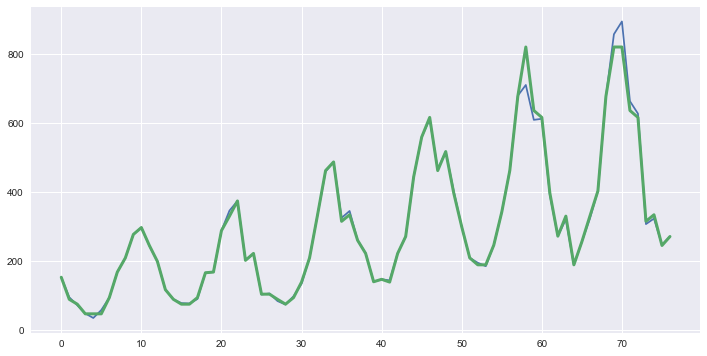

In [246]:
model = GaussianHMM(n_components=50,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [247]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(50, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [248]:
new_series = np.concatenate((values, np.array(predictions)))

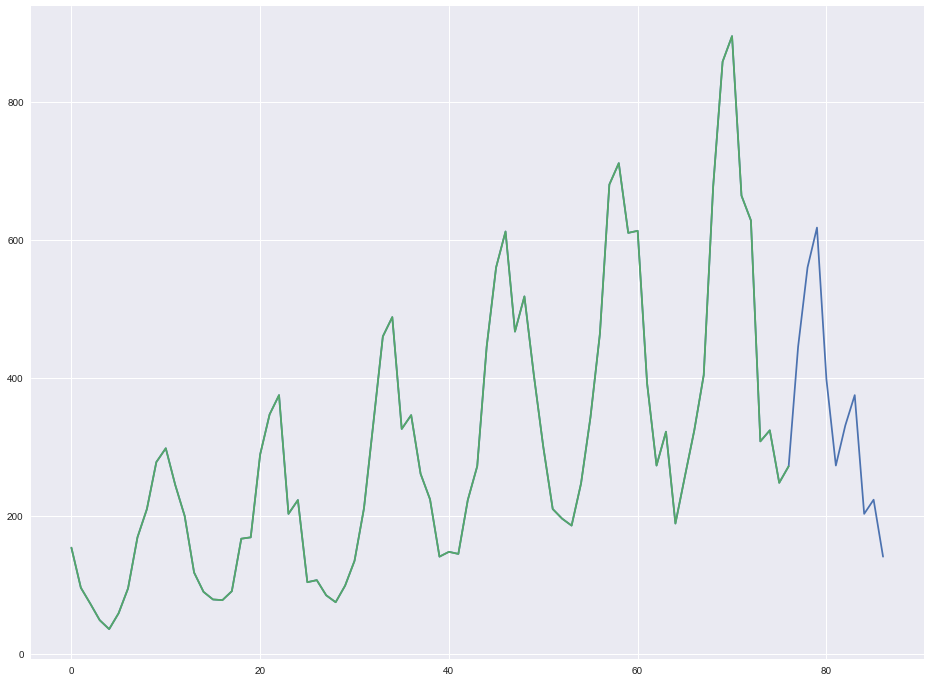

In [249]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()